In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_excel("Japan-Korea-Singapore-Thailand-Int-Group.new.xlsx")

In [3]:
df

,Date,Country/Territory/Area,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-23,Australia,22,0,0,12,10
1,2020-02-19,Australia,15,0,0,12,3
2,2020-02-15,Australia,15,0,0,12,3
3,2020-02-11,Australia,15,0,0,15,0
4,2020-02-07,Australia,15,0,0,15,0
5,2020-02-03,Australia,12,0,0,12,0
6,2020-02-23,Belgium,1,0,0,1,0
7,2020-02-19,Belgium,1,0,0,1,0
8,2020-02-15,Belgium,1,0,0,1,0
9,2020-02-11,Belgium,1,0,0,1,0


In [5]:
dfNew=df.groupby(df['Date']).sum()

In [6]:
dfNew.reset_index()

,Date,Confirmed Cases,Exposure under investigation,Total Deaths,Exposure in China,Exposure outside China
0,2020-02-03,153,6,1,123,24
1,2020-02-07,238,66,1,150,54
2,2020-02-11,261,146,1,165,84
3,2020-02-15,271,229,2,170,127
4,2020-02-19,275,570,3,174,180
5,2020-02-23,410,965,17,178,626


In [7]:
day=pd.Series([1,2,3,4,5,6])

In [8]:
cases=dfNew['Confirmed Cases']

In [9]:
coefDeg3=np.polyfit(day,cases,3)

In [10]:
coefDeg3

array([  9.12962963, -92.75396825, 307.83068783, -73.66666667])

In [11]:
equ=np.poly1d(coefDeg3)

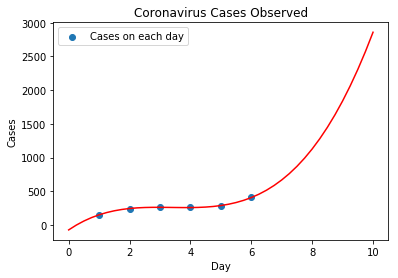

In [13]:
x_plot =np.linspace(0,10,41)
y_plot=equ(x_plot)
plt.plot(x_plot,y_plot,color='r')
cases=dfNew["Confirmed Cases"]

plt.scatter(day,cases,label='Cases on each day')
plt.title("Coronavirus Cases Observed")
plt.xlabel('Day')
plt.ylabel('Cases')
plt.legend()


plt.show()

In [14]:
polyDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [16]:
polyDf.to_csv(r'poly-JAPAN-KOREA-SING-THAI-INT-d3.csv')